# Анализ базы данных крупного сервиса для чтения книг по подписке

<a id="Начало_проекта"></a>

<div style="border:solid black 2px; padding: 20px">

Компания купила крупный сервис для чтения книг по подписке. И аналитикам поставлена задача — проанализировать базу данных.
В ней — информация о книгах, издательствах, авторах, а также пользовательские обзоры книг. Эти данные помогут нам сформулировать ценностное предложение для нового продукта.

**Цель исследования** 
* Проанализировать базу данных;
* Исследовать количество обзоров и среднюю оценку по книгам;
* Определить топовое издательство по количеству выпущенных книг;
* Определить топового автора по средней оценке книг;
* Исследовать среднее количество обзоров от пользователей.

**Ход исследования**

В нашем распоряжении есть база данных. О качестве данных нам ничего не известно. Поэтому перед исследованием проведем обзор данных.

Таким образом, исследование пройдёт в 4 этапа:
1. [Загрузка данных](#Загрузка)
2. [Обзор данных](#Обзор)
3. [Исследовательский анализ данных](#Исследовательский_анализ_данных)
4. [Итоги исследования](#Итоги_исследования)


</div>

<div style="border:solid black 2px; padding: 20px">

**Описание данных.**

**Таблица books**

Содержит данные о книгах:
* book_id — идентификатор книги;
* author_id — идентификатор автора;
* title — название книги;
* num_pages — количество страниц;
* publication_date — дата публикации книги;
* publisher_id — идентификатор издателя.

**Таблица authors**

Содержит данные об авторах:
* author_id — идентификатор автора;
* author — имя автора.

**Таблица publishers**

Содержит данные об издательствах:
* publisher_id — идентификатор издательства;
* publisher — название издательства;

**Таблица ratings**

Содержит данные о пользовательских оценках книг:
* rating_id — идентификатор оценки;
* book_id — идентификатор книги;
* username — имя пользователя, оставившего оценку;
* rating — оценка книги.

**Таблица reviews**

Содержит данные о пользовательских обзорах:
* review_id — идентификатор обзора;
* book_id — идентификатор книги;
* username — имя автора обзора;
* text — текст обзора.

</div>

[Начало_проекта](#Начало_проекта)

<a id="Загрузка"></a>

## Загрузка данных

In [1]:
# импортируем библиотеки
import pandas as pd
from sqlalchemy import text, create_engine
import plotly.express as px

In [2]:
# устанавливаем параметры
db_config = {'user': 'praktikum_student', # имя пользователя
'pwd': 'Sdf4$2;d-d30pp', # пароль
'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
'port': 6432, # порт подключения
'db': 'data-analyst-final-project-db'} # название базы данных
connection_string = 'postgresql://{user}:{pwd}@{host}:{port}/{db}'.format(**db_config)

# сохраняем коннектор
engine = create_engine(connection_string, connect_args={'sslmode':'require'})

con=engine.connect()

[Начало_проекта](#Начало_проекта)

<a id="Обзор"></a>

## Обзор данных

### Таблица books

In [3]:
# books
total_books = ('''
SELECT TABLE_NAME, 
       COLUMN_NAME,
       DATA_TYPE
FROM information_schema.columns
WHERE table_name = 'books'
;''')

books_cnt = ('''
SELECT COUNT(*) AS cnt_total,
       COUNT(book_id) AS cnt_book_id,
       COUNT(author_id) AS cnt_author_id,
       COUNT(num_pages) AS cnt_num_pages,
       COUNT(publication_date) AS cnt_publication_date,
       COUNT(publisher_id) AS cnt_publisher_id,
       COUNT(title) AS cnt_title,
       COUNT(DISTINCT book_id) AS dist_book_id,
       COUNT(DISTINCT author_id) AS dist_author_id,
       COUNT(DISTINCT publisher_id) AS dist_publisher_id
FROM books
;''')

books_head = ('''
SELECT *
FROM books
LIMIT 5
;''')

print('-'*50)
print('Информация о таблице books')
print('-'*50)
display(pd.io.sql.read_sql(sql=text(total_books), con = con))
display(pd.io.sql.read_sql(sql=text(books_cnt), con = con))
display(pd.io.sql.read_sql(sql=text(books_head), con = con))

--------------------------------------------------
Информация о таблице books
--------------------------------------------------


,table_name,column_name,data_type
0,books,book_id,integer
1,books,author_id,integer
2,books,num_pages,integer
3,books,publication_date,date
4,books,publisher_id,integer
5,books,title,text


,cnt_total,cnt_book_id,cnt_author_id,cnt_num_pages,cnt_publication_date,cnt_publisher_id,cnt_title,dist_book_id,dist_author_id,dist_publisher_id
0,1000,1000,1000,1000,1000,1000,1000,1000,636,340


,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268


### Таблица authors

In [4]:
# authors
total_authors = ('''
SELECT TABLE_NAME, 
       COLUMN_NAME,
       DATA_TYPE
FROM information_schema.columns
WHERE table_name = 'authors'
;''')

authors_cnt = ('''
SELECT COUNT(*) AS cnt_total,
       COUNT(author_id) AS cnt_author_id,
       COUNT(author) AS cnt_author,
       COUNT(DISTINCT author_id) AS dist_author_id
FROM authors
;''')

authors_head = ('''
SELECT *
FROM authors
LIMIT 5
;''')

print('-'*50)
print('Информация о таблице authors')
print('-'*50)
display(pd.io.sql.read_sql(sql=text(total_authors), con = con))
display(pd.io.sql.read_sql(sql=text(authors_cnt), con = con))
display(pd.io.sql.read_sql(sql=text(authors_head), con = con))

--------------------------------------------------
Информация о таблице authors
--------------------------------------------------


,table_name,column_name,data_type
0,authors,author_id,integer
1,authors,author,text


,cnt_total,cnt_author_id,cnt_author,dist_author_id
0,636,636,636,636


,author_id,author
0,1,A.S. Byatt
1,2,Aesop/Laura Harris/Laura Gibbs
2,3,Agatha Christie
3,4,Alan Brennert
4,5,Alan Moore/David Lloyd


### Таблица ratings

In [5]:
# ratings
total_ratings = ('''
SELECT TABLE_NAME, 
       COLUMN_NAME,
       DATA_TYPE
FROM information_schema.columns
WHERE table_name = 'ratings'
;''')

ratings_cnt = ('''
SELECT COUNT(*) AS cnt_total,
       COUNT(rating_id) AS cnt_rating_id,
       COUNT(book_id) AS cnt_book_id,
       COUNT(username) AS cnt_username,
       COUNT(rating) AS cnt_rating,
       COUNT(DISTINCT book_id) AS dist_book_id
FROM ratings
;''')

ratings_head = ('''
SELECT *
FROM ratings
LIMIT 5
;''')

print('-'*50)
print('Информация о таблице ratings')
print('-'*50)
display(pd.io.sql.read_sql(sql=text(total_ratings), con = con))
display(pd.io.sql.read_sql(sql=text(ratings_cnt), con = con))
display(pd.io.sql.read_sql(sql=text(ratings_head), con = con))

--------------------------------------------------
Информация о таблице ratings
--------------------------------------------------


,table_name,column_name,data_type
0,ratings,rating_id,integer
1,ratings,book_id,integer
2,ratings,rating,integer
3,ratings,username,text


,cnt_total,cnt_rating_id,cnt_book_id,cnt_username,cnt_rating,dist_book_id
0,6456,6456,6456,6456,6456,1000


,rating_id,book_id,username,rating
0,1,1,ryanfranco,4
1,2,1,grantpatricia,2
2,3,1,brandtandrea,5
3,4,2,lorichen,3
4,5,2,mariokeller,2


### Таблица reviews

In [6]:
# reviews
total_reviews = ('''
SELECT TABLE_NAME, 
       COLUMN_NAME,
       DATA_TYPE
FROM information_schema.columns
WHERE table_name = 'reviews'
;''')

reviews_cnt = ('''
SELECT COUNT(*) AS cnt_total,
       COUNT(review_id) AS cnt_review_id,
       COUNT(book_id) AS cnt_book_id,
       COUNT(username) AS cnt_username,
       COUNT(text) AS cnt_text,
       COUNT(DISTINCT book_id) AS dist_book_id,
       COUNT(DISTINCT username) AS dist_username
FROM reviews
;''')

reviews_head = ('''
SELECT *
FROM reviews
LIMIT 5
;''')

print('-'*50)
print('Информация о таблице reviews')
print('-'*50)
display(pd.io.sql.read_sql(sql=text(total_reviews), con = con))
display(pd.io.sql.read_sql(sql=text(reviews_cnt), con = con))
display(pd.io.sql.read_sql(sql=text(reviews_head), con = con))

--------------------------------------------------
Информация о таблице reviews
--------------------------------------------------


,table_name,column_name,data_type
0,reviews,review_id,integer
1,reviews,book_id,integer
2,reviews,username,text
3,reviews,text,text


,cnt_total,cnt_review_id,cnt_book_id,cnt_username,cnt_text,dist_book_id,dist_username
0,2793,2793,2793,2793,2793,994,160


,review_id,book_id,username,text
0,1,1,brandtandrea,Mention society tell send professor analysis. ...
1,2,1,ryanfranco,Foot glass pretty audience hit themselves. Amo...
2,3,2,lorichen,Listen treat keep worry. Miss husband tax but ...
3,4,3,johnsonamanda,Finally month interesting blue could nature cu...
4,5,3,scotttamara,Nation purpose heavy give wait song will. List...


### Таблица publishers

In [7]:
# publishers
total_publishers = ('''
SELECT TABLE_NAME, 
       COLUMN_NAME,
       DATA_TYPE
FROM information_schema.columns
WHERE table_name = 'publishers'
;''')

publishers_cnt = ('''
SELECT COUNT(*) AS cnt_total,
       COUNT(publisher_id) AS cnt_publisher_id,
       COUNT(publisher) AS cnt_publisher,
       COUNT(DISTINCT publisher_id) AS dist_publisher_id,
       COUNT(DISTINCT publisher) AS dist_publisher
FROM publishers
;''')

publishers_head = ('''
SELECT *
FROM publishers
LIMIT 5
;''')

print('-'*50)
print('Информация о таблице publishers')
print('-'*50)
display(pd.io.sql.read_sql(sql=text(total_publishers), con = con))
display(pd.io.sql.read_sql(sql=text(publishers_cnt), con = con))
display(pd.io.sql.read_sql(sql=text(publishers_head), con = con))

--------------------------------------------------
Информация о таблице publishers
--------------------------------------------------


,table_name,column_name,data_type
0,publishers,publisher_id,integer
1,publishers,publisher,text


,cnt_total,cnt_publisher_id,cnt_publisher,dist_publisher_id,dist_publisher
0,340,340,340,340,340


,publisher_id,publisher
0,1,Ace
1,2,Ace Book
2,3,Ace Books
3,4,Ace Hardcover
4,5,Addison Wesley Publishing Company


### Вывод

<div style="border:solid green 2px; padding: 20px">

*Структура базы данных:*
    
* В базе данных 5 таблиц.
    * books 1000 строк
    * authors 636 строк
    * ratings 6456 строк
    * reviews 2793 строк
    * publishers 340 строк
* Пропусков нет.
* Типы данных корректные.
* В таблице reviews уникальных значений book_id 994, в таблице books 1000 уникальных значений book_id. Можно предположить, что не все книги имеют пользовательские обзоры.
    

</div>

[Начало_проекта](#Начало_проекта)

<a id="Исследовательский_анализ_данных"></a>

## Исследовательский анализ данных

### Количество выпущенных книг по годам

<div style="border:solid black 2px; padding: 20px">

Исследуем год публикации книг в сервисе.

Посчитаем, сколько книг вышло после 1 января 2000 г. (эту дату включать не будем).

</div>

In [8]:
books_cnt_after_2000_01_01 = ('''
SELECT COUNT(book_id) AS books_cnt_after_2000_01_01
FROM books
WHERE publication_date > '2000-01-01'
;''')

print('Количество книг, изданных после 1 января 2000г.')
print('-'*50)
display(pd.io.sql.read_sql(sql=text(books_cnt_after_2000_01_01), con = con))

books_cnt_total = ('''
SELECT COUNT(book_id) AS books_cnt_total
FROM books
;''')

print('Общее количество книг в каталоге')
print('-'*50)
display(pd.io.sql.read_sql(sql=text(books_cnt_total), con = con))

Количество книг, изданных после 1 января 2000г.
--------------------------------------------------


,books_cnt_after_2000_01_01
0,819


Общее количество книг в каталоге
--------------------------------------------------


,books_cnt_total
0,1000


In [9]:
books_cnt_by_year = ('''
SELECT EXTRACT(YEAR FROM publication_date) AS publication_year,
       COUNT(book_id) AS cnt_books
FROM books
GROUP BY EXTRACT(YEAR FROM publication_date)
ORDER BY EXTRACT(YEAR FROM publication_date)
;''')

print('Количество книг по году публикации')
print('-'*50)
books_cnt_years = pd.io.sql.read_sql(sql=text(books_cnt_by_year), con = con)
books_cnt_years

Количество книг по году публикации
--------------------------------------------------


,publication_year,cnt_books
0,1952.0,1
1,1977.0,1
2,1980.0,2
3,1982.0,5
4,1983.0,1
5,1984.0,1
6,1986.0,2
7,1987.0,7
8,1988.0,5
9,1989.0,5


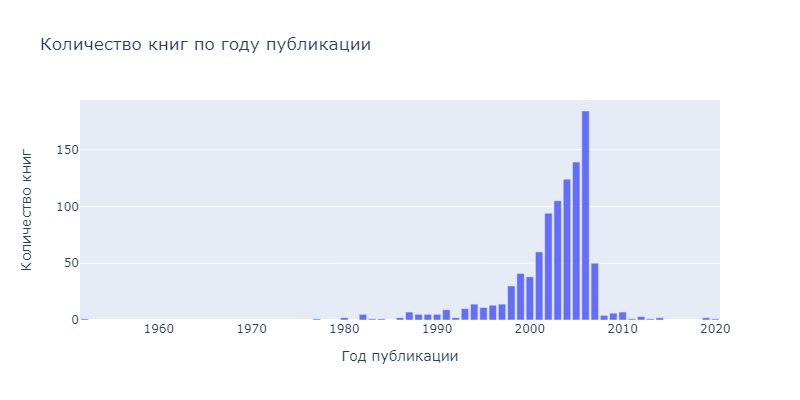

In [10]:
fig_books_cnt_years = px.bar(books_cnt_years, x='publication_year', y='cnt_books',
                             title='Количество книг по году публикации')
fig_books_cnt_years.update_layout(width=800, height=400,
                                  yaxis_title='Количество книг', xaxis_title='Год публикации')
fig_books_cnt_years.show('png')

<div style="border:solid green 2px; padding: 20px">

**Количество книг в разрезе даты публикации.**    
    
Всего в базе 1000 уникальных книг.

Книги были изданы в период с 1952г. по 2020г.
    
После 1 января 2000г. было издано 819 книг, т.е. большая часть из нашего каталога.
    
В каталоге больше всего книг, изданных в 2006г.
    
В каталоге мало книг последнего десятилетия, возможно стоит уделить внимание в ассортименте современной литературе.

</div>

### Количество обзоров и средняя оценка книги

<div style="border:solid black 2px; padding: 20px">

Для каждой книги посчитаем количество обзоров и среднюю оценку.

</div>

In [11]:
min_max_rating = ('''
SELECT MIN(rating),
       MAX(rating),
       COUNT(DISTINCT rating) AS dist,
       COUNT(rating)
FROM ratings
;''')

print('Минимальный и максимальный рейтинг книг')
print('-'*50)
pd.io.sql.read_sql(sql=text(min_max_rating), con = con)

Минимальный и максимальный рейтинг книг
--------------------------------------------------


,min,max,dist,count
0,1,5,5,6456


In [12]:
min_max_cnt_reviews = ('''
SELECT MIN(r.cnt_review),
       MAX(r.cnt_review),
       SUM(r.cnt_review) AS cnt_review
FROM
(
SELECT book_id,
       COUNT(review_id) AS cnt_review
FROM reviews
GROUP BY book_id
) r
;''')

print('Количество обзоров')
print('-'*50)
pd.io.sql.read_sql(sql=text(min_max_cnt_reviews), con = con)

Количество обзоров
--------------------------------------------------


,min,max,cnt_review
0,1,7,2793.0


In [13]:
rating_books = ('''
SELECT b.book_id AS id,
       b.title,
       b.publication_date,
       COALESCE(COUNT(DISTINCT re.review_id)) AS cnt_review,
       COALESCE(ROUND(AVG(ra.rating), 2)) AS avg_rating
FROM books AS b
JOIN ratings AS ra ON b.book_id = ra.book_id
LEFT JOIN reviews AS re ON b.book_id = re.book_id
GROUP BY b.book_id,
         b.title,
         b.publication_date
ORDER BY avg_rating DESC,
cnt_review DESC
;''')

rating_books = pd.io.sql.read_sql(rating_books, con = engine)
print('TOP-10 по рейтингу')
print('-'*50)
rating_books.head(10)

TOP-10 по рейтингу
--------------------------------------------------


,id,title,publication_date,cnt_review,avg_rating
0,17,A Dirty Job (Grim Reaper #1),2006-03-21,4,5.0
1,553,School's Out—Forever (Maximum Ride #2),2006-05-23,3,5.0
2,444,Moneyball: The Art of Winning an Unfair Game,2004-03-17,3,5.0
3,642,The Big Bad Wolf (Alex Cross #9),2004-10-01,2,5.0
4,967,Welcome to Temptation (Dempseys #1),2004-07-11,2,5.0
5,513,Piercing the Darkness (Darkness #2),2003-06-26,2,5.0
6,390,Light in August,1991-01-30,2,5.0
7,516,Plum Island (John Corey #1),2002-01-01,2,5.0
8,224,Evening Class,2005-06-30,2,5.0
9,598,Stolen (Women of the Otherworld #2),2004-09-28,2,5.0


In [14]:
reviews_books = ('''
SELECT b.book_id AS id,
       b.title,
       b.publication_date,
       COALESCE(COUNT(DISTINCT re.review_id)) AS cnt_review,
       COALESCE(ROUND(AVG(ra.rating), 2)) AS avg_rating
FROM books AS b
JOIN ratings AS ra ON b.book_id = ra.book_id
LEFT JOIN reviews AS re ON b.book_id = re.book_id
GROUP BY b.book_id,
         b.title,
         b.publication_date
         ORDER BY cnt_review DESC,
                  avg_rating DESC
;''')

reviews_books = pd.io.sql.read_sql(reviews_books, con = engine)
print('TOP-10 по количеству обзоров')
print('-'*50)
reviews_books.head(10)

TOP-10 по количеству обзоров
--------------------------------------------------


,id,title,publication_date,cnt_review,avg_rating
0,948,Twilight (Twilight #1),2006-09-06,7,3.66
1,302,Harry Potter and the Prisoner of Azkaban (Harr...,2004-05-01,6,4.41
2,299,Harry Potter and the Chamber of Secrets (Harry...,1999-06-02,6,4.29
3,656,The Book Thief,2006-03-14,6,4.26
4,734,The Glass Castle,2006-01-17,6,4.21
5,750,The Hobbit or There and Back Again,2002-08-15,6,4.13
6,497,Outlander (Outlander #1),2005-07-26,6,4.13
7,779,The Lightning Thief (Percy Jackson and the Oly...,2006-03-01,6,4.08
8,695,The Curious Incident of the Dog in the Night-Time,2004-05-18,6,4.08
9,963,Water for Elephants,2007-05-01,6,3.98


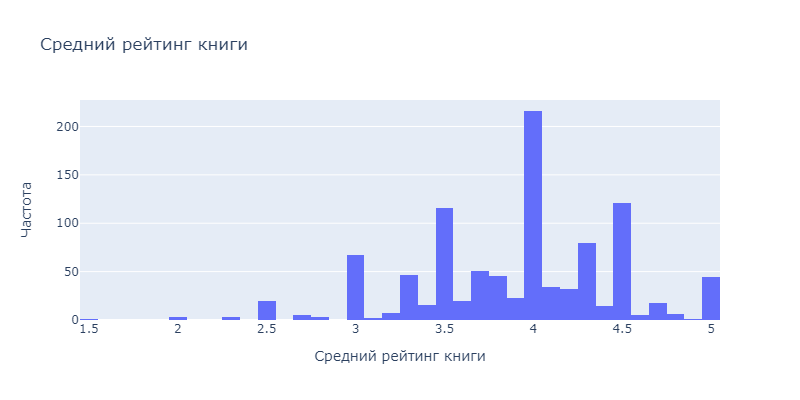

In [15]:
fig_rating = px.histogram(rating_books, x='avg_rating', title='Средний рейтинг книги') 
fig_rating.update_layout(width=800, height=400,
                         yaxis_title='Частота', xaxis_title='Средний рейтинг книги')
fig_rating.show('png')

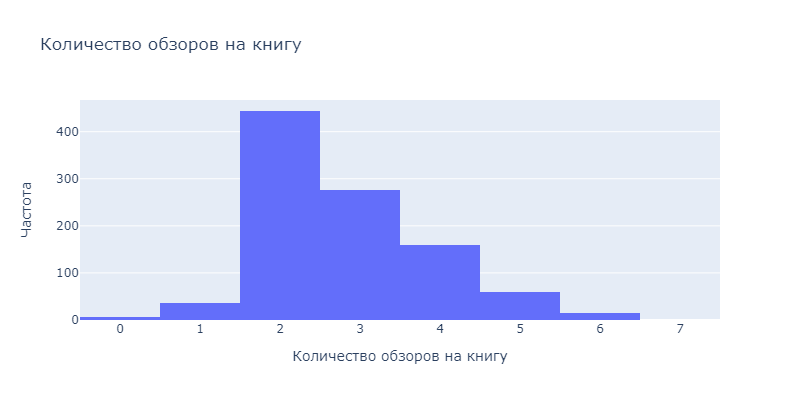

In [16]:
fig_review = px.histogram(reviews_books, x='cnt_review', title='Количество обзоров на книгу')

fig_review.update_layout(width=800, height=400,
                         yaxis_title='Частота', xaxis_title='Количество обзоров на книгу')
fig_review.show('png')

<div style="border:solid green 2px; padding: 20px">


**Количество обзоров и средняя оценка книги.**    
    
*Рейтинги.*

* Минимальный рейтинг в таблице: 1, максимальный: 5. Уникальных значений 5. 
* Минимальный средний рейтинг книги: 1.5.
* Максимальный средний рейтинг книги: 5. 44 книги имеют рейтинг 5.
* Самый частый средний рейтинг книги: 4.
    
*Количество обзоров.*
* Минимальное количество обзоров у книги: 0.
* Максимальное количество обзоров у книги: 7.
* Чаще всего у книги 2 обзора.
* Книга с самым большим количеством обзоров Twilight (Twilight 1) - Сумерки, книга 1.

Так как в большинстве случаев у книг 2 обзора необходимо разработать программу мотивации пользователей на написание обзоров.

</div>

### Популярное издательство

<div style="border:solid black 2px; padding: 20px">

Определим издательство, которое выпустило наибольшее число книг толще 50 страниц (так исключим из анализа брошюры).

</div>

In [17]:
p = ('''
SELECT p.publisher, 
       COUNT(b.publisher_id) AS count_books
FROM publishers AS p
LEFT JOIN books AS b ON b.publisher_id = p.publisher_id
WHERE b.num_pages > 50
GROUP BY p.publisher
ORDER BY COUNT(b.publisher_id) DESC
LIMIT 1;''')

print('Популярное издательство по количеству выпущенных книг толще 50 страниц')
print('-'*50)
p = pd.io.sql.read_sql(p, con = engine)
p

Популярное издательство по количеству выпущенных книг толще 50 страниц
--------------------------------------------------


,publisher,count_books
0,Penguin Books,42


<div style="border:solid green 2px; padding: 20px">

Самое крупное издательство по количеству выпущенных книг (толще 50 страниц) - Penguin Books 42 книги.
    
> В 2001 году издательство стало проигрывать в США своему основному местному конкуренту — издательству Random House. В 2013 году они объединились, создав первую в мире глобальную издательскую компанию (Penguin Random House).

Информация из статьи [Penguin_Books](https://ru.wikipedia.org/wiki/Penguin_Books)


</div>

### Популярный автор книг

<div style="border:solid black 2px; padding: 20px">

Определим автора с самой высокой средней оценкой книг, будем учитывать только книги с 50 и более оценками.

</div>

In [18]:
top_author = ('''
WITH
r AS
(
SELECT book_id,
       AVG(rating) AS avg_rating
FROM ratings book_id
GROUP BY book_id
HAVING COUNT(rating) >= 50
)

SELECT a.author_id,
       a.author,
       ROUND(AVG(avg_rating), 2) AS avg_rating
FROM authors AS a
INNER JOIN books AS b ON a.author_id = b.author_id
INNER JOIN r ON b.book_id = r.book_id
GROUP BY a.author_id,
         a.author
ORDER BY ROUND(AVG(avg_rating), 2) DESC
LIMIT 3
;''')

print('Top-3 автора с самой высокой средней оценкой книг')
print('-'*50)
pd.io.sql.read_sql(sql=text(top_author), con = con)

Top-3 автора с самой высокой средней оценкой книг
--------------------------------------------------


,author_id,author,avg_rating
0,236,J.K. Rowling/Mary GrandPré,4.28
1,240,J.R.R. Tolkien,4.26
2,402,Markus Zusak/Cao Xuân Việt Khương,4.26


In [19]:
top_books = ('''
WITH
r AS
(
SELECT book_id,
       AVG(rating) AS avg_rating
FROM ratings book_id
GROUP BY book_id
HAVING COUNT(rating) >= 50
)

SELECT b.book_id,
       b.title,
       a.author,
       EXTRACT(YEAR FROM b.publication_date) AS publication_year,
       ROUND(AVG(avg_rating), 2) AS avg_rating
FROM authors AS a
INNER JOIN books AS b ON a.author_id = b.author_id
INNER JOIN r ON b.book_id = r.book_id
GROUP BY b.book_id,
         b.title,
         a.author,
         EXTRACT(YEAR FROM b.publication_date)
ORDER BY ROUND(AVG(avg_rating), 2) DESC
LIMIT 5
;''')

print('Top-5 книг с самой высокой средней оценкой, где оценок больше 50')
print('-'*50)
pd.io.sql.read_sql(sql=text(top_books), con = con)

Top-5 книг с самой высокой средней оценкой, где оценок больше 50
--------------------------------------------------


,book_id,title,author,publication_year,avg_rating
0,302,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,2004.0,4.41
1,722,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. Tolkien,2003.0,4.39
2,299,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling/Mary GrandPré,1999.0,4.29
3,656,The Book Thief,Markus Zusak/Cao Xuân Việt Khương,2006.0,4.26
4,300,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,2006.0,4.25


<div style="border:solid green 2px; padding: 20px">

Автор с самой высокой средней оценкой книг (4.28) - J.K. Rowling/Mary GrandPré. J.K. Rowling - автор книг, Mary GrandPré - иллюстратор книг J.K. Rowling.
    
В top-5 по среднему рейтингу книг (где оценок больше 50) входит сразу 3 книги J.K. Rowling о Гарри Поттере.

</div>

### Cреднее количество обзоров от пользователей

<div style="border:solid black 2px; padding: 20px">

Посчитаем среднее количество обзоров от пользователей, которые поставили больше 48 оценок.

</div>

In [20]:
cnt_reviews_users = ('''
SELECT AVG(cnt)
FROM
(
SELECT username,
       COUNT(review_id) as cnt
FROM reviews
WHERE username IN (
                   SELECT username
                   FROM ratings
                   GROUP BY username
                   HAVING COUNT(rating_id) > 48
                   )
GROUP BY username
)
AS cnt
;''')

print('Среднее количество обзоров от пользователей, которые поставили больше 48 оценок')
print('-'*50)
pd.io.sql.read_sql(sql=text(cnt_reviews_users), con = con)

Среднее количество обзоров от пользователей, которые поставили больше 48 оценок
--------------------------------------------------


,avg
0,24.0


In [21]:
cnt_reviews_users_all = ('''
SELECT username,
       COUNT(review_id) as cnt_reviews
FROM reviews
GROUP BY username
ORDER BY COUNT(review_id) DESC
;''')

print('Количество обзоров от пользователей')
print('-'*50)
cnt_reviews_users_all = pd.io.sql.read_sql(sql=text(cnt_reviews_users_all), con = con)
cnt_reviews_users_all

Количество обзоров от пользователей
--------------------------------------------------


,username,cnt_reviews
0,susan85,29
1,sfitzgerald,28
2,martinadam,27
3,lesliegibbs,26
4,eallen,26
...,...,...
155,todd65,10
156,joseph14,10
157,dwayne09,10
158,robert00,9


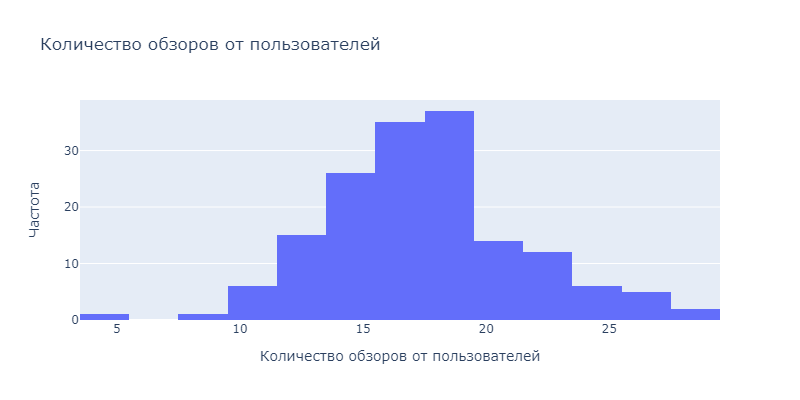

In [22]:
fig_reviews_users = px.histogram(cnt_reviews_users_all, x='cnt_reviews', title='Количество обзоров от пользователей') 
fig_reviews_users.update_layout(width=800, height=400,
                                yaxis_title='Частота', xaxis_title='Количество обзоров от пользователей')
fig_reviews_users.show('png')

<div style="border:solid green 2px; padding: 20px">

**Количество обзоров от пользователей.**
    
160 пользователей писали обзоры.
    
В большинстве случаев у пользователей 16-19 обзоров.
    
Среднее количество обзоров от пользователей, которые поставили больше 48 оценок: 24.
    
</div>

[Начало_проекта](#Начало_проекта)

<a id="Итоги_исследования"></a>

## Итоги исследования

<div style="border:solid blue 2px; padding: 20px">

    
**Количество книг в разрезе даты публикации.**    
    
Всего в базе 1000 уникальных книг.

Книги были изданы в период с 1952г. по 2020г.
    
После 1 января 2000г. было издано 819 книг, т.е. большая часть из нашего каталога.
    
В каталоге больше всего книг, изданных в 2006г.
    
В каталоге мало книг последнего десятилетия, возможно стоит уделить внимание в ассортименте современной литературе.
    

**Количество обзоров и средняя оценка книги.**    
 
*Рейтинги.*   
    
* Минимальный рейтинг в таблице: 1, максимальный: 5. Уникальных значений 5.  
* Минимальный средний рейтинг книги: 1.5.
* Максимальный средний рейтинг книги: 5. 44 книги имеют рейтинг 5.
* Самый частый средний рейтинг книги: 4.
    
*Количество обзоров.*
* Минимальное количество обзоров у книги: 0.
* Максимальное количество обзоров у книги: 7.
* Чаще всего у книги 2 обзора.
* Книга с самым большим количеством обзоров Twilight (Twilight 1) - Сумерки, книга 1.	

Так как в большинстве случаев у книг 2 обзора необходимо разработать программу мотивации пользователей на написание обзоров.

**Популярное издательство.**      
    
Самое крупное издательство по количеству выпущенных книг (толще 50 страниц) - Penguin Books 42 книги.
    
> В 2001 году издательство стало проигрывать в США своему основному местному конкуренту — издательству Random House. В 2013 году они объединились, создав первую в мире глобальную издательскую компанию (Penguin Random House).

Информация из статьи [Penguin_Books](https://ru.wikipedia.org/wiki/Penguin_Books)
  
**Популярный автор.**     
    
Автор с самой высокой средней оценкой книг (4.28) - J.K. Rowling/Mary GrandPré. J.K. Rowling - автор книг, Mary GrandPré - иллюстратор книг J.K. Rowling.
    
В top-5 по среднему рейтингу книг (где оценок больше 50) входит сразу 3 книги J.K. Rowling о Гарри Поттере.
    
**Количество обзоров от пользователей.**
    
160 пользователей писали обзоры.
    
В большинстве случаев у пользователей 16-19 обзоров.
    
Среднее количество обзоров от пользователей, которые поставили больше 48 оценок: 24.    
    
    
</div>